In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

### Read Data

In [2]:
df = pd.read_csv("../data/uso.csv")
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-04-10,546.000000,548.000000,541.359985,544.159973,544.159973,484738
1,2006-04-11,546.559998,547.119995,538.400024,545.599976,545.599976,162138
2,2006-04-12,545.760010,550.479980,542.479980,542.719971,542.719971,156038
3,2006-04-13,540.000000,551.919983,539.200012,550.559998,550.559998,70088
4,2006-04-17,553.599976,559.200012,549.440002,558.320007,558.320007,114713


### EDA

In [4]:
fig = px.line(df, x='Date', y=[i for i in df.columns if i not in ["Date", "Volume"]], title='USO ETF Prices')
fig.show()

In [5]:
fig = px.line(df, x='Date', y='Volume', title='USO ETF Volumes')
fig.show()

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>, <Axes: >, <Axes: >]],
      dtype=object)

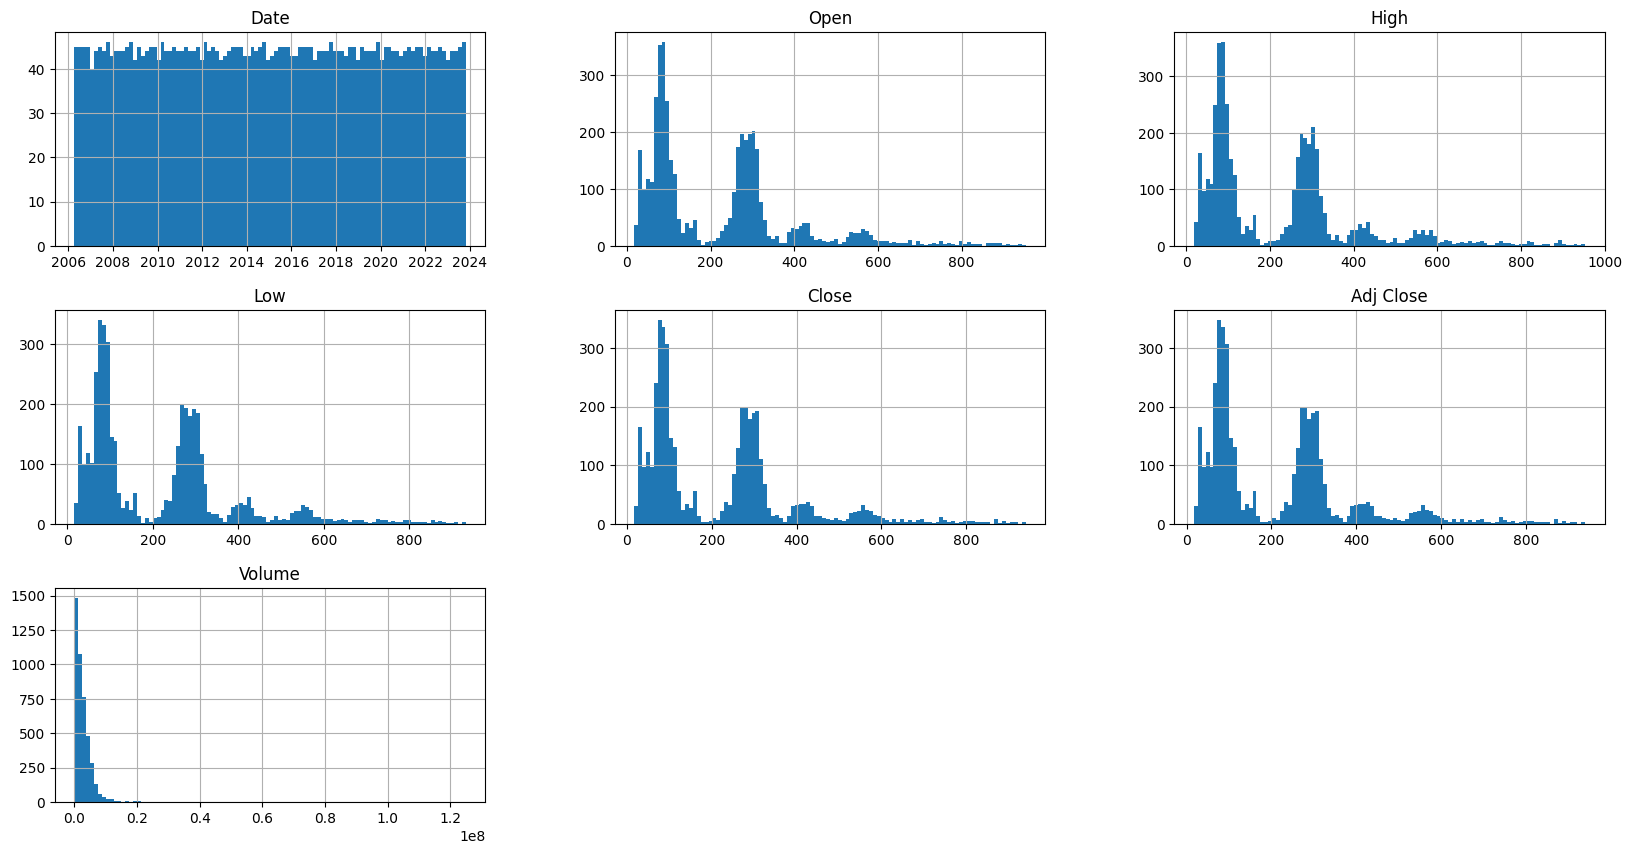

In [6]:
df.hist(figsize=(20, 10), bins=100)

In [7]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# Dates missing
start_date = df['Date'].min()
end_date = df['Date'].max()

print("Date Range:\n", start_date, " --> ", end_date)

# Generate list of dates
date_range = pd.date_range(start=start_date, end=end_date)

# Convert the date_range to a list if needed
date_list = date_range.tolist()

# Create series
dates = pd.DataFrame(date_list, columns=['Date'])

# Merged data 
merged_df = pd.merge(dates, df, how='left', left_on='Date', right_on='Date')

weekends_to_fill = len(merged_df[merged_df['Open'].isna()])
total_days = len(dates)

print(f"There are {total_days} days to be considered, with {total_days-weekends_to_fill} having data and {weekends_to_fill} missing data")

Date Range:
 2006-04-10 00:00:00  -->  2023-10-27 00:00:00
There are 6410 days to be considered, with 4419 having data and 1991 missing data


In [11]:
# plt.candlestick_ohlc(df['open'], df['high'], df["low"], df["close"])
import plotly.graph_objects as go

fig = go.Figure()

# Add candlestick trace
fig.add_trace(go.Candlestick(
  x=df['Date'],
  open=df['Open'],
  high=df['High'],
  low=df['Low'],
  close=df['Close']
))

fig.show()